In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
a = torch.tensor([2., 2.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [3]:
test=torch.tensor([[1,2],[3,4]],requires_grad=True)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [ ]:
M=torch.tensor([[1.,2.],[3.,4.]])

print(M)


In [5]:
M*a

tensor([[2., 4.],
        [6., 8.]], grad_fn=<MulBackward0>)

In [15]:
m=torch.tensor([0.,0.],requires_grad=True)
n=np.zeros(2)
target=torch.tensor([10.,2.])

In [7]:
def net(m):
    y=m*a
    return y


In [8]:
test1=net(n)
print(test1)

tensor([2., 2.], grad_fn=<MulBackward0>)


In [17]:
import torch.optim as optim
optimizer = torch.optim.Adam([m], lr=0.01, betas=(0.9, 0.999), eps=1e-6, weight_decay=0.001, amsgrad=False)  #adam optimizer
criterion=nn.MSELoss()
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(m)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    print(loss)

tensor(52., grad_fn=<MseLossBackward>)
tensor(51.7604, grad_fn=<MseLossBackward>)
tensor(51.5216, grad_fn=<MseLossBackward>)
tensor(51.2837, grad_fn=<MseLossBackward>)
tensor(51.0466, grad_fn=<MseLossBackward>)
tensor(50.8104, grad_fn=<MseLossBackward>)
tensor(50.5750, grad_fn=<MseLossBackward>)
tensor(50.3405, grad_fn=<MseLossBackward>)
tensor(50.1069, grad_fn=<MseLossBackward>)
tensor(49.8743, grad_fn=<MseLossBackward>)
tensor(49.6425, grad_fn=<MseLossBackward>)
tensor(49.4117, grad_fn=<MseLossBackward>)
tensor(49.1819, grad_fn=<MseLossBackward>)
tensor(48.9530, grad_fn=<MseLossBackward>)
tensor(48.7250, grad_fn=<MseLossBackward>)
tensor(48.4980, grad_fn=<MseLossBackward>)
tensor(48.2720, grad_fn=<MseLossBackward>)
tensor(48.0470, grad_fn=<MseLossBackward>)
tensor(47.8229, grad_fn=<MseLossBackward>)
tensor(47.5999, grad_fn=<MseLossBackward>)
tensor(47.3779, grad_fn=<MseLossBackward>)
tensor(47.1568, grad_fn=<MseLossBackward>)
tensor(46.9368, grad_fn=<MseLossBackward>)
tensor(46.7178,

In [13]:
print(m)

tensor([4.8303, 0.9997], requires_grad=True)


In [35]:
size=10
ez=np.zeros((size,size))
hx=np.zeros((size,size))
hy=np.zeros((size,size))
Eps=np.ones((size,size))
Eps=torch.tensor(Eps)
ez=torch.tensor(ez)
hx=torch.tensor(hx)
hy=torch.tensor(hy)

In [36]:
print(Eps)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=torch.float64)


In [37]:

def fieldupdate3(T=10,size=100,E=ez,Hx=hx,Hy=hy,Eps=Eps):
    imp0=377
#     E_history=[]
#     Hx_history=[]
#     Hy_history=[]
#     test=[]
    for t in range(T):
        for i in range(size):
            for j in range(size-1):
                Hx[i][j]=Hx[i][j]+(E[i][j+1]-E[i][j])/imp0/2/Eps[i][j]

        for i in range(size-1):
            for j in range(size):
                
                Hy[i][j]=Hy[i][j]+(E[i+1][j]-E[i][j])/imp0/2
                
                
        for i in range(size-1):
            for j in range(size-1):
                E[i+1][j+1]=E[i+1][j+1]+(Hx[i+1][j+1]+Hy[i+1][j+1]-Hx[i+1][j]-Hy[i][j+1])*imp0/2
        #E[int(size/4)][int(size/4)]+=math.sin(0.1*t)
        E[int(size/2)][int(size/2)]+=math.sin(0.1*t)
        E[int(size/2)][int(size/2)+1]+=math.sin(0.1*t)
        #E[int(size/2)][int(size/2)]+=math.exp(-(t+1-0.3*size)*(t+1-0.3*size)/100)
#         test.append(E[int(0.5*size)])
#         E_history.append(E.copy())
#         Hx_history.append(Hx.copy())
#         Hy_history.append(Hy.copy())
#     with open("E field history.txt", 'w') as f:
#         for member in E_history:
#             f.write(str(member) + '\n')
#     with open("Hx field history.txt", 'w') as f:
#         for member in Hx_history:
#             f.write(str(member) + '\n')
#     with open("Hy field history.txt", 'w') as f:
#         for member in Hy_history:
#             f.write(str(member) + '\n')
#     E_history=np.array(E_history)
        
    return E


In [40]:
import time
start_time = time.time()


E=fieldupdate3(100,size,ez,hx,hy)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.7961711883544922 seconds ---


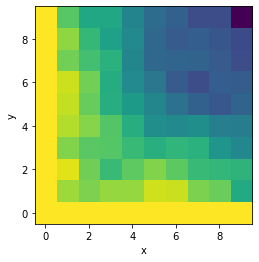

In [41]:

plt.xlabel('x')
plt.ylabel('y')
plt.imshow(E,origin='lower')

In [125]:
M=np.ones((size,size))
M=torch.tensor(M,requires_grad=True)
target=torch.tensor([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.],dtype=torch.float64)
#target=target.unsqueeze(1)
X=torch.ones([10,1], dtype=torch.float64)
print(target.size())
pred=torch.matmul(M,X)
pred=pred.reshape([10,])
print(pred.size())
print(target-pred)

torch.Size([10])
torch.Size([10])
tensor([-9., -8., -7., -6., -5., -4., -3., -2., -1.,  0.], dtype=torch.float64,
       grad_fn=<SubBackward0>)


In [126]:
import torch.optim as optim
optimizer = torch.optim.Adam([X], lr=0.01, betas=(0.9, 0.999), eps=1e-9, weight_decay=0.1, amsgrad=False)  #adam optimizer
criterion=nn.MSELoss()
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = torch.matmul(M,X)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    print(loss)

tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(28.5000, dtype=torch.float64, gra

In [127]:
print(M)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=torch.float64,
       requires_grad=True)


In [121]:
M=np.ones((2,2))
M=torch.tensor(M,requires_grad=True)
target=torch.tensor([7.,10.],dtype=torch.float64)
#target=target.unsqueeze(1)
X=torch.tensor([1.,2.], dtype=torch.float64)
print(target.size())
pred=torch.matmul(M,X)
pred=pred.reshape([2,])
print(target-pred)

torch.Size([2])
tensor([4., 7.], dtype=torch.float64, grad_fn=<SubBackward0>)


In [123]:
import torch.optim as optim
optimizer = torch.optim.Adam({M}, lr=0.01, betas=(0.9, 0.999), eps=1e-6, weight_decay=0.001, amsgrad=False)  #adam optimizer
criterion=nn.MSELoss()
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = torch.matmul(M,X)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    print(loss)

tensor(2.5846, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.5083, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.4339, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.3613, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.2907, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.2220, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.1551, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.0902, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.0271, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.9658, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.9063, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.8484, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.7920, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.7370, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.6834, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.6310, dtype=torch.float64, grad_fn=<MseLossBac

In [124]:
print(M)

tensor([[2.3118, 2.3433],
        [3.3313, 3.3335]], dtype=torch.float64, requires_grad=True)
